# DS 5110: Homework 1

## Instructions

* **Submitting assignments**
  * Submit your assignment by the deadline posted in canvas.
  * Upload your Colab notebooks on **canvas** using the Google Drive option.
* **Access permissions** 
  * Make sure that you have set access permissions to your notebook and any related datasets so that anyone with a Northeastern account can run your notebook in Colab to completion without errors.
* **Use markdown** 
  * Any written responses should appear in separate Text cells that use Markdown for formatting. Code comments are encouraged, but will be ignored for grading purposes. Solutions that are especially difficult to grade due to poor formatting will not receive full credit.
* **Work on your own** 
  * All solutions to the given problems must be your own work. If you use third-party code for ancillary tasks, you must cite your sources.

SRI NAGA SAI SUSHMA KONDABOLU

# Part A: Convenience functions

This part of the assignment asks you to write simple "convenience functions" that allow you to re-use code.
These functions will make it easy for you to create several custom visualizations that differ only slightly from one another. The next cell creates a dataset of pseudo-random numbers and provides a baseline histogram.
Use the dataset to answer the questions in Part A.

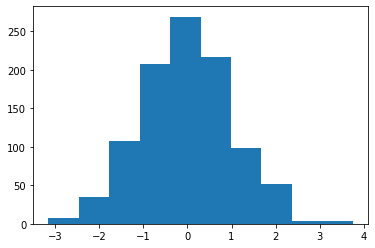

In [136]:
import matplotlib.pyplot as plt
import random

# For reproducibility
random.seed(42)

# Generate some data with a random normal distribution
data = [random.gauss(0, 1) for i in range(1000)]
# Plot a histogram of the data
plt.hist(data);

## Problem A.1

Write a function `clipped_hist(df, clip_threshold)` that plots a histogram of the data after applying a filter that removes all the data above a maximum value, `clip_threshold`.
The default threshold should be 1.0.
The title of the plot should indicate the the number of values clipped and the value of the clipping threshold. Use a list comprehension when manipulating the data.

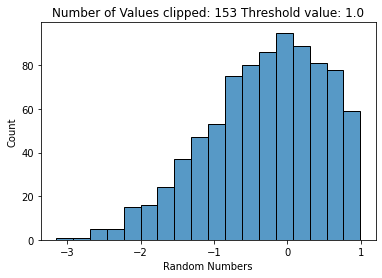

In [137]:
import seaborn as sns
def clipped_hist(df,clip_threshold=1.0):
  df1=[]
  df1=[df[i] for i in range(len(df)) if df[i]<=clip_threshold ]
  fig,hist_plot=plt.subplots()
  hist_plot = sns.histplot(data=df1)
  str1= str(len(df)-len(df1))
  hist_plot.set_xlabel('Random Numbers')
  hist_plot.set_title('Number of Values clipped: '+str1+' Threshold value: '+str(clip_threshold))

clipped_hist(data)

## Problem A.2

Use the convenience function from A.1 to create a plot for `clip_threshold = 2`. This should require only one line of code.

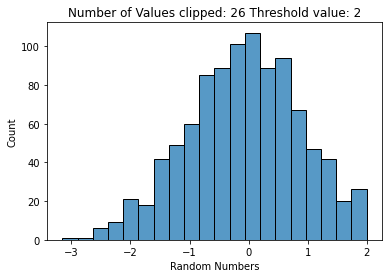

In [138]:
clipped_hist(data,2)

## Problem A.3

Modify the convenience function from Problem A.1 to plot a Gaussian distribution on top of a normalized histogram.

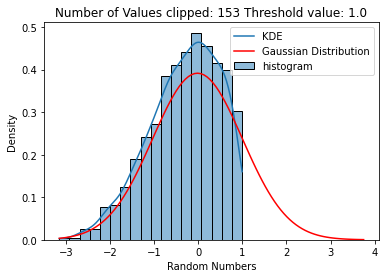

In [139]:
import numpy as np
from scipy.stats import norm

def clipped_hist(df,clip_threshold=1.0):
  df1=[]
  df1=[df[i] for i in range(len(df)) if df[i]<=clip_threshold ]
  fig,hist_plot=plt.subplots()
  #hist_plot = sns.histplot(data=df1)
  str1= str(len(df)-len(df1))
  hist_plot.set_xlabel('Random Numbers')
  hist_plot.set_title('Number of Values clipped: '+str1+' Threshold value: '+str(clip_threshold))
  mu,sigma=norm.fit(df)
  xmin,xmax=min(data),max(data)
  x=np.linspace(xmin,xmax,100)
  y=norm.pdf(x,mu,sigma)
  sns.histplot(df1, stat="density", kde=True, label="histogram")
  hist_plot.get_lines()[0].set_label("KDE")
  hist_plot.plot(x, y, c="red", label='Gaussian Distribution')
  hist_plot.legend();

clipped_hist(data)






# Problem A.4

Use the result of Problem A.3 to show tha the standard normal PDF does a nice job of interpolating the normalized hisogram when the threshold is set high enough so that there is no clipping.
Now that you have a convenience function from A.3, this should involve only one line of code.

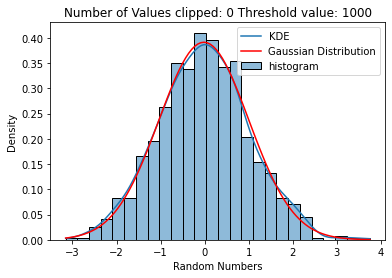

In [140]:
clipped_hist(data,1000)

# Part B: Gapminder dataset

## Problem B.1 -- distribution of life expectancy by continent

Visualize the distribution of life expectancy using histograms or density plots, faceted by continent. Describe the shape of the distributions of life expectancy, and any relationships you notice between life expectancy and continent.

In [141]:
# Import pandas (standard practice)
import pandas as pd
import seaborn as sns

# Find some data (a CSV file on github)
url = "https://github.com/ds5110/summer-2021/raw/master/data/gapminder.csv"

# Load the CSV into a pandas DataFrame
df = pd.read_csv(url)

# Inspect the data
df = pd.read_csv(url)
df.drop("Unnamed: 0", 1, inplace=True)
df


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


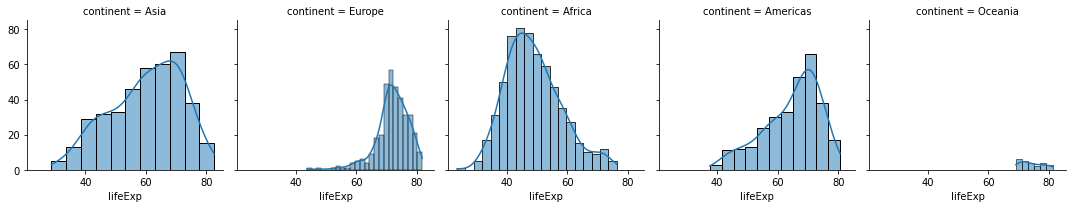

In [142]:
pl=sns.FacetGrid(df,col='continent')
#pl.fig.suptitle('lifeExp vs Count')
pl.map(sns.histplot,'lifeExp',kde='True');

-> The shape of Asia's 'lifeExp' distribution reminds of a left skewed distribution. Though there is considerably good amount of data in other intervals, maximum data is located in the range of 60-80.
-> The shape of the distribution of life expectancy in Europe is left skewed. Majority of the data of 'lifeExp' feature falls between the range of 60-80.
-> The shape of the distribution of Africa is right skewed. A large portion of the data of 'lifeExp' feature for Africa falls between 40-60.
-> The 'lifeExp' distribution for Americas is left skewed, maximum amount of data is in the range of 60-80.
-> The amount of data to comment on 'lifeExp' for Oceania is low but with the available data it can be inferred that 'lifeExp' for Oceania has either uniform or bimodal kind of distribution.

## Problem B.2 -- box plot

For each continent, use box-and-whisker plots to visualize the distribution of life expectancy over time (i.e., for each year in the dataset from 1952 to 2007). Comment on any trends you see in the evolution of
life expectancy over the years.

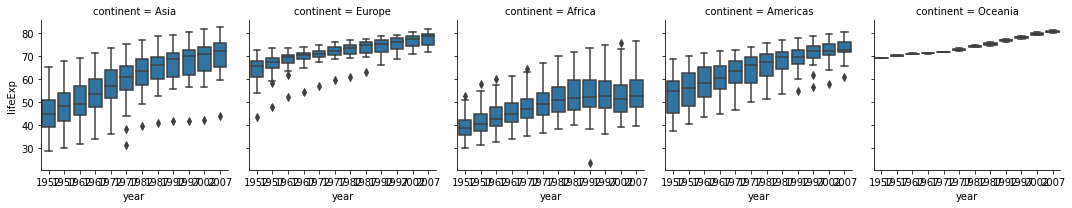

In [143]:
bplt=sns.FacetGrid(df,col='continent')
bplt.map(sns.boxplot,'year','lifeExp',order=None);

-> For Asia, the median of the data is increasing every year and the outliers are in greater number from the years after 1972.
->The median of the 'lifeExp' is increasing every measurement year for Europe as well but it isn't a great difference from the preceeding year. The outliers are in large numbers until the year 1987, after that there's no considerable depiction of outliers on the plot.
->The median of the data for Africa hasn't shown any higher difference from earlier year's measurement throughout the observation.
-> The median of 'lifeExp' for America increased in the intial years but towards the end of the observation the median remained visibly constant and the number of outliers have become significant.
->From the available data of Oceania it can be seen that the lifeExp is increasing over the years

## Problem B.3 -- scatterplot

Use a scatter plot to visualize the relationship between life expectancy and GDP per capita. 
Use a log scale for GDP. Comment on the relationship between life expectancy and GDP per capita and any outliers you may notice.

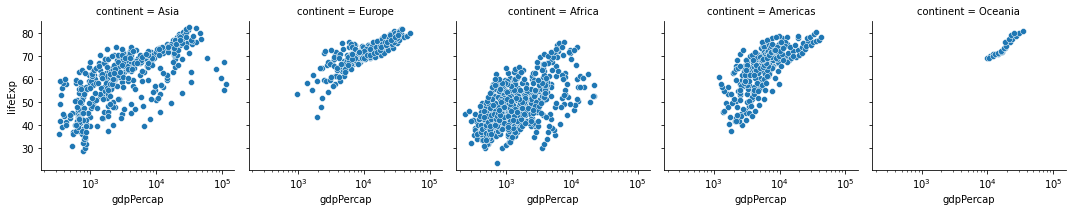

In [144]:
splt=sns.FacetGrid(df,col='continent')
splt.map(sns.scatterplot,'gdpPercap','lifeExp').set(xscale='log');

-> Asia has great amount of outliers and there seems to be a positive correlation between 'lifeExp' and 'gdpPercap', as the increase in 'gdpPercap' is showing an increase in 'lifeExp'.
-> The outliers are less in Europe, there is a positive correlation between 'lifeExp' and 'gdpPercap', as the increase in 'gdpPercap' is showing an increase in 'lifeExp'.
-> Africa's data makes it unclear to arrive at a definite relationship between  'lifeExp' and 'gdpPercap', but if taken into consideration that the number of outliers are more, it can be said that the correlation between 'lifeExp' and 'gdpPercap' is positive.
-> There is a positive correlation between 'lifeExp' and 'gdpPercap' for Americas and the number of outliers are less in number compared to Asia.
-> With the available data, Oceania exhibits a positive correlation between 'lifeExp' and 'gdpPercap'